In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
icd = pd.read_csv("icd9.csv")

In [5]:
icd

,subject_id,hadm_id,sequence,code,description
0,56,28766,1,198.3,SECONDARY MALIGNANT NEOPLASM OF BRAIN AND SPIN...
1,56,28766,2,162.8,MALIGNANT NEOPLASM OF OTHER PARTS OF BRONCHUS ...
2,56,28766,3,531.40,CHRONIC OR UNSPECIFIED GASTRIC ULCER WITH HEMO...
3,56,28766,4,276.1,HYPOSMOLALITY AND/OR HYPONATREMIA
4,56,28766,5,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED
...,...,...,...,...,...
53481,32763,33007,18,V45.81,POSTSURGICAL AORTOCORONARY BYPASS STATUS
53482,32763,33007,19,V15.84,PERSONAL HISTORY OF EXPOSURE TO ASBESTOS
53483,32763,33007,20,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
53484,32763,33007,21,553.20,UNSPECIFIED VENTRAL HERNIA WITHOUT OBSTRUCTION...


In [6]:
icd.description.nunique()

3605

In [7]:
icd.code.shape

(53486,)

## Working to Map ICD-9 Codes to the description 

The strategy used for doing this was to first separate codes which are numeric to the codes which are alpha numeric and store them to fl_df and str_df

In [8]:
a = []
b = []

for i in icd.code:
    
    try:
        a.append(float(i))
        
    except:
        b.append(i)

In [9]:
len(a), len(b)

(48829, 4657)

In [10]:
48829+4657

53486

In [11]:
str_df = icd[icd['code'].isin(b)]
str_df

,subject_id,hadm_id,sequence,code,description
24,78,15161,8,E850.2,ACCIDENTAL POISONING BY OTHER OPIATES AND RELA...
25,78,15161,9,E853.2,ACCIDENTAL POISONING BY BENZODIAZEPINE-BASED T...
48,12,12532,9,E878.2,SURGICAL OPERATION WITH ANASTOMOSIS BYPASS OR ...
90,31,15325,7,E933.1,ANTINEOPLASTIC AND IMMUNOSUPPRESSIVE DRUGS CAU...
108,21,20666,17,V10.46,PERSONAL HISTORY OF MALIGNANT NEOPLASM OF PROS...
...,...,...,...,...,...
53433,32667,36071,10,E879.8,OTHER SPECIFIED PROCEDURES AS THE CAUSE OF ABN...
53455,32627,33957,16,V45.01,CARDIAC PACEMAKER IN SITU
53469,32763,33007,6,V42.2,HEART VALVE REPLACED BY TRANSPLANT
53481,32763,33007,18,V45.81,POSTSURGICAL AORTOCORONARY BYPASS STATUS


In [12]:
fl_df = icd[~icd['code'].isin(b)]
fl_df

,subject_id,hadm_id,sequence,code,description
0,56,28766,1,198.3,SECONDARY MALIGNANT NEOPLASM OF BRAIN AND SPIN...
1,56,28766,2,162.8,MALIGNANT NEOPLASM OF OTHER PARTS OF BRONCHUS ...
2,56,28766,3,531.40,CHRONIC OR UNSPECIFIED GASTRIC ULCER WITH HEMO...
3,56,28766,4,276.1,HYPOSMOLALITY AND/OR HYPONATREMIA
4,56,28766,5,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED
...,...,...,...,...,...
53479,32763,33007,16,272.0,PURE HYPERCHOLESTEROLEMIA
53480,32763,33007,17,573.0,CHRONIC PASSIVE CONGESTION OF LIVER
53483,32763,33007,20,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
53484,32763,33007,21,553.20,UNSPECIFIED VENTRAL HERNIA WITHOUT OBSTRUCTION...


In [13]:
fl_df = fl_df.astype({"code":float})

In [14]:
# Creating a dictionary for mapping IC9-codes and their respective classification of diseases (on the codes which do not
# have any alphabets)

d1 = {
"Metabolic disorder" : "240-279",
"Pulmonary disease" : "460-519",
"Other forms of heart disease" : "420-429",
"Digestive disease" : "520-579",
"Ischemic heart disease" : "410-414",
"Renal insufficiency" : "580-629",
"Hypertensive disease" : "401-405",
"Symptoms, signs, & ill-defined conditions" : "780-799",
"Diseases of the blood & bloodforming organs" : "280-289", 
"Trauma" : "800-959",
"Heart failure" : "428",
"Infectious diseases" : "001-139",
"Mental disorders" : "290-319",
"Arteries & veins" : "440-459",
"Neoplasms": "140-239",
"Neurologic disease" : "320-389",
"Diseases of the musculoskeletal system & connective tissue" : "710-739",
"Other complications of procedures, NEC": "998",
"Cerebrovascular disease" : "430-438", 
"Diseases of the skin & subcutaneous tissue": "680-709",
"Complications affecting specified body systems, not elsewhere classified" : "997",
"Complications peculiar to certain specified procedures" : "996",
"Other & unspecified effects of external causes" : "990-995",
"Chronic rheumatic heart disease" :"393-398",
"Diseases of pulmonary circulation" : "415-417",
"Congenital anomalies" : "740-759",
"Complications of pregnancy, childbirth, & the puerperium" : "630-677",
"Poisoning" : "960-989",
"Complications of medical care, not elsewhere classified": "999",
"Acute Rheumatic fever": "390-392"
}

In [15]:
df_base_fl = pd.DataFrame()

for i, j in d1.items():
    
    try:
        a, b = j.split("-")

        df = fl_df.loc[(fl_df.code >= int(a)) & (fl_df.code <= int(b))]
        df = df.assign(category = i)

        df_base_fl = pd.concat([df_base_fl, df])
    
    except:
        a = j.split("-")
        df = fl_df.loc[fl_df.code == int(a[0])]
        df = df.assign(category = i)

        df_base_fl = pd.concat([df_base_fl , df])    

In [16]:
df_base_fl.duplicated().sum()

0

In [17]:
str_df1 = str_df.copy()

In [18]:
str_df1["code"] = str_df.code.apply(lambda x: x.strip("EV"))

In [19]:
str_df1

,subject_id,hadm_id,sequence,code,description
24,78,15161,8,850.2,ACCIDENTAL POISONING BY OTHER OPIATES AND RELA...
25,78,15161,9,853.2,ACCIDENTAL POISONING BY BENZODIAZEPINE-BASED T...
48,12,12532,9,878.2,SURGICAL OPERATION WITH ANASTOMOSIS BYPASS OR ...
90,31,15325,7,933.1,ANTINEOPLASTIC AND IMMUNOSUPPRESSIVE DRUGS CAU...
108,21,20666,17,10.46,PERSONAL HISTORY OF MALIGNANT NEOPLASM OF PROS...
...,...,...,...,...,...
53433,32667,36071,10,879.8,OTHER SPECIFIED PROCEDURES AS THE CAUSE OF ABN...
53455,32627,33957,16,45.01,CARDIAC PACEMAKER IN SITU
53469,32763,33007,6,42.2,HEART VALVE REPLACED BY TRANSPLANT
53481,32763,33007,18,45.81,POSTSURGICAL AORTOCORONARY BYPASS STATUS


In [20]:
str_df1 = str_df1.astype({"code":float})

In [21]:
# Creating a dictionary for mapping IC9-codes and their respective classification of diseases (on the codes which 
# have alphabets) 


d2 = {"Supplementary classification of external causes of injury and poisoning"
: "E800-E999",
"Supp. factors influencing health" :
"V01-V86" }

# (Note) Supplementary classification of factors influencing health status and contact with health services shorten to Supp. factors
# influencing health

In [22]:
df_base_str = pd.DataFrame()

for i,j in d2.items():
    
    a,b = j.split("-")
     
    num1 = a.strip("EV")
    num2 = b.strip("EV")
    
    df = str_df1.loc[(str_df1.code >= int(num1)) & (str_df1.code <= int(num2))]
#     df["category"] = np.nan
    
    
    df = df.assign(category = i)
    
    df_base_str = pd.concat([df_base_str, df])    

In [23]:
df_base_str

,subject_id,hadm_id,sequence,code,description,category
24,78,15161,8,850.20,ACCIDENTAL POISONING BY OTHER OPIATES AND RELA...,Supplementary classification of external cause...
25,78,15161,9,853.20,ACCIDENTAL POISONING BY BENZODIAZEPINE-BASED T...,Supplementary classification of external cause...
48,12,12532,9,878.20,SURGICAL OPERATION WITH ANASTOMOSIS BYPASS OR ...,Supplementary classification of external cause...
90,31,15325,7,933.10,ANTINEOPLASTIC AND IMMUNOSUPPRESSIVE DRUGS CAU...,Supplementary classification of external cause...
130,21,20882,21,878.80,ABN REACT-SURG PROC NEC \r,Supplementary classification of external cause...
...,...,...,...,...,...,...
53431,32667,36071,8,66.70,ENCOUNTER FOR PALLIATIVE CARE,Supp. factors influencing health
53455,32627,33957,16,45.01,CARDIAC PACEMAKER IN SITU,Supp. factors influencing health
53469,32763,33007,6,42.20,HEART VALVE REPLACED BY TRANSPLANT,Supp. factors influencing health
53481,32763,33007,18,45.81,POSTSURGICAL AORTOCORONARY BYPASS STATUS,Supp. factors influencing health


In [24]:
df_base_fl

,subject_id,hadm_id,sequence,code,description,category
3,56,28766,4,276.10,HYPOSMOLALITY AND/OR HYPONATREMIA,Metabolic disorder
6,56,28766,7,272.00,PURE HYPERCHOLESTEROLEMIA,Metabolic disorder
15,37,18052,8,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...,Metabolic disorder
33,26,15067,8,272.00,PURE HYPERCHOLESTEROLEMIA,Metabolic disorder
36,67,35878,2,244.90,UNSPECIFIED ACQUIRED HYPOTHYROIDISM,Metabolic disorder
...,...,...,...,...,...,...
40917,21592,23312,1,962.30,POISONING BY INSULINS AND ANTIDIABETIC AGENTS,Poisoning
45162,23872,1952,1,977.80,POISON-MEDICINAL AGT NEC \r,Poisoning
47697,25322,21638,4,965.09,POISONING BY OTHER OPIATES AND RELATED NARCOTICS,Poisoning
50029,26555,592,1,966.30,POISONING BY OTHER AND UNSPECIFIED ANTICONVULS...,Poisoning


In [25]:
# This is the df, which has the mapping of ICD-9 codes

df_icd = pd.concat([df_base_fl,df_base_str])

In [26]:
df_icd.reset_index(drop = True)
df_icd

,subject_id,hadm_id,sequence,code,description,category
3,56,28766,4,276.10,HYPOSMOLALITY AND/OR HYPONATREMIA,Metabolic disorder
6,56,28766,7,272.00,PURE HYPERCHOLESTEROLEMIA,Metabolic disorder
15,37,18052,8,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...,Metabolic disorder
33,26,15067,8,272.00,PURE HYPERCHOLESTEROLEMIA,Metabolic disorder
36,67,35878,2,244.90,UNSPECIFIED ACQUIRED HYPOTHYROIDISM,Metabolic disorder
...,...,...,...,...,...,...
53431,32667,36071,8,66.70,ENCOUNTER FOR PALLIATIVE CARE,Supp. factors influencing health
53455,32627,33957,16,45.01,CARDIAC PACEMAKER IN SITU,Supp. factors influencing health
53469,32763,33007,6,42.20,HEART VALVE REPLACED BY TRANSPLANT,Supp. factors influencing health
53481,32763,33007,18,45.81,POSTSURGICAL AORTOCORONARY BYPASS STATUS,Supp. factors influencing health


In [27]:
df_icd.to_csv("icd_mapped_categories.csv", index = False)

## Getting only sequence 1, becasue this will be the primary diagnosis.

## But first we have to merge df_icd with pat, in this way we will be able to filter out the

## first admission ID and then we will take the least number of sequence.

In [28]:
# Now working on to get only those categories which are in our selected patients.

In [29]:
pat = pd.read_csv("selected_ids.csv")

In [30]:
pat["subject_id"].nunique()

3923

In [31]:
# merging pat and icd_df

In [32]:
# icd_df = pd.read_csv("icd_mapped_categories.csv")

In [33]:
df = pat.merge(df_icd, how = "left", on = "hadm_id")
df

,subject_id_x,hadm_id,admit_dt,sex,dob,age_at_adm,subject_id_y,sequence,code,description,category
0,3,2075,2682-09-07,M,2606-02-28,76.0,3.0,9.0,263.90,UNSPECIFIED PROTEIN-CALORIE MALNUTRITION,Metabolic disorder
1,3,2075,2682-09-07,M,2606-02-28,76.0,3.0,4.0,427.50,CARDIAC ARREST,Other forms of heart disease
2,3,2075,2682-09-07,M,2606-02-28,76.0,3.0,6.0,428.00,CONGESTIVE HEART FAILURE UNSPECIFIED,Other forms of heart disease
3,3,2075,2682-09-07,M,2606-02-28,76.0,3.0,8.0,425.40,OTHER PRIMARY CARDIOMYOPATHIES,Other forms of heart disease
4,3,2075,2682-09-07,M,2606-02-28,76.0,3.0,5.0,410.71,SUBENDOCARDIAL INFARCTION INITIAL EPISODE OF CARE,Ischemic heart disease
...,...,...,...,...,...,...,...,...,...,...,...
38305,32763,33007,2724-06-05,M,2645-04-10,79.0,32763.0,3.0,428.00,CONGESTIVE HEART FAILURE UNSPECIFIED,Heart failure
38306,32763,33007,2724-06-05,M,2645-04-10,79.0,32763.0,13.0,38.90,UNSPECIFIED SEPTICEMIA,Infectious diseases
38307,32763,33007,2724-06-05,M,2645-04-10,79.0,32763.0,6.0,42.20,HEART VALVE REPLACED BY TRANSPLANT,Supp. factors influencing health
38308,32763,33007,2724-06-05,M,2645-04-10,79.0,32763.0,18.0,45.81,POSTSURGICAL AORTOCORONARY BYPASS STATUS,Supp. factors influencing health


In [34]:
df["hadm_id"].nunique()

3923

In [35]:
# The reason why there are not 3923 rows in df is that a patient on his admission may be diagnosed by multiple disorders
# i.e categories. But if we check unique hadm_ids, they are 3923. which means that the data is retrieved for 3923 patients,
# but since one patient can have multiple diseases, so the total rows become 38310.

## Working to filter out the min of sequence so that we will get the primary diagnosis.

In [36]:
df2 = df.sort_values(["subject_id_x", "sequence"]).drop_duplicates('subject_id_y')
df2

,subject_id_x,hadm_id,admit_dt,sex,dob,age_at_adm,subject_id_y,sequence,code,description,category
8,3,2075,2682-09-07,M,2606-02-28,76.0,3.0,1.0,38.90,UNSPECIFIED SEPTICEMIA,Infectious diseases
15,12,12532,2875-09-26,M,2803-05-14,72.0,12.0,1.0,157.00,MALIGNANT NEOPLASM OF HEAD OF PANCREAS,Neoplasms
25,21,20666,3138-10-29,M,3051-05-22,87.0,21.0,1.0,410.71,SUBENDOCARDIAL INFARCTION INITIAL EPISODE OF CARE,Ischemic heart disease
34,26,15067,3079-03-03,M,3007-03-02,72.0,26.0,2.0,427.10,PAROXYSMAL VENTRICULAR TACHYCARDIA,Other forms of heart disease
45,31,15325,2678-08-21,M,2606-05-17,72.0,31.0,1.0,345.30,GRAND MAL STATUS EPILEPTIC,Neurologic disease
...,...,...,...,...,...,...,...,...,...,...,...
38260,32686,30102,2612-05-27,M,2543-12-06,68.0,32686.0,1.0,518.81,ACUTE RESPIRATORY FAILURE,Pulmonary disease
38270,32705,33462,3337-04-06,F,3257-03-05,80.0,32705.0,1.0,38.90,UNSPECIFIED SEPTICEMIA,Infectious diseases
38277,32706,35651,2676-03-20,M,2595-02-14,81.0,32706.0,1.0,431.00,INTRACEREBRAL HEMORRHAGE,Cerebrovascular disease
38285,32711,36069,3143-05-20,F,3057-12-21,85.0,32711.0,1.0,441.01,DISSECTION OF AORTA THORACIC,Arteries & veins


In [37]:
df2.to_csv("patients_first_diagnosis_cat.csv", index = False)

In [38]:
df2['subject_id_x'].duplicated().sum()

0

In [39]:
a = df2.groupby("category").size().sort_values(ascending= False).head(10)

In [40]:
b = df2.groupby("category").size().sort_values(ascending= False).to_frame()

In [41]:
b= b.reset_index().rename(columns = {0:"Count"})

In [42]:
b['percentage'] = b.Count.apply(lambda x: x*100/b.Count.sum())
c= b.head(10)
c

,category,Count,percentage
0,Pulmonary disease,490,12.496812
1,Ischemic heart disease,437,11.145116
2,Digestive disease,433,11.043101
3,Neoplasms,427,10.890079
4,Other forms of heart disease,410,10.456516
5,Infectious diseases,408,10.405509
6,Trauma,356,9.079317
7,Cerebrovascular disease,335,8.543739
8,Arteries & veins,145,3.698036
9,Renal insufficiency,99,2.524866


# Viz for Top 10 Disease Dignosis

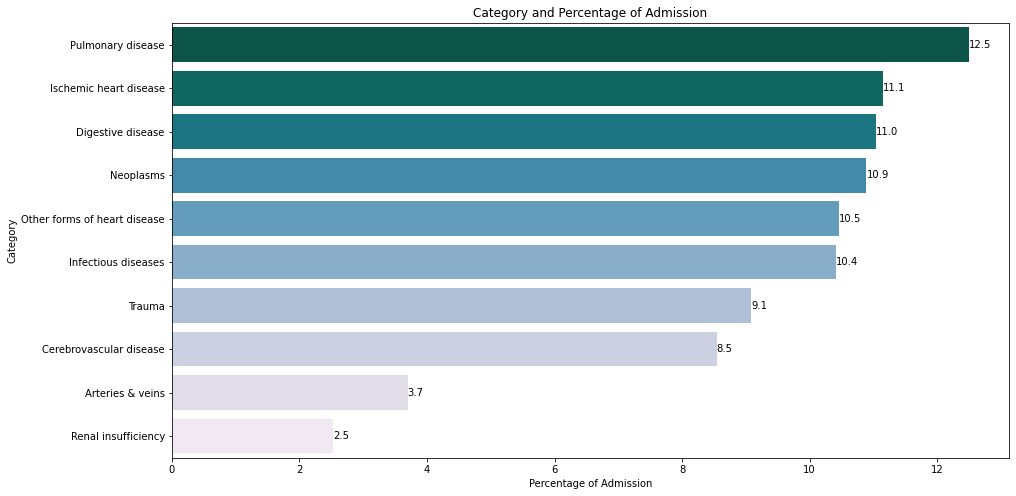

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(data = c, x = 'percentage', y = 'category', palette='PuBuGn_r')

ax.bar_label(ax.containers[0], fmt = '%.1f')

plt.xlabel(x:="Percentage of Admission")
plt.ylabel(y:="Category")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=0)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

In [44]:
all_cat = df2.groupby("category")['sex'].value_counts().to_frame()

In [45]:
all_cat.rename(columns = {"sex":"Count"}, inplace = True)

In [46]:
sorted_cat = all_cat.reset_index().sort_values(['sex', 'Count'])
sorted_cat.rename(columns = {"sex":"Gender"}, inplace = True)
sorted_cat

,category,Gender,Count
35,"Other complications of procedures, NEC",F,1
46,Supplementary classification of external cause...,F,1
6,"Complications of pregnancy, childbirth, & the ...",F,2
7,Congenital anomalies,F,2
26,Mental disorders,F,2
18,Diseases of the skin & subcutaneous tissue,F,4
33,Other & unspecified effects of external causes,F,4
45,Supp. factors influencing health,F,5
14,Diseases of the blood & bloodforming organs,F,9
39,Poisoning,F,9


In [47]:
# sns.barplot(data = sorted_cat, x='category' ,y = 'Count', hue= 'sex')

In [48]:
top_10 = df2.groupby("category").size().sort_values(ascending= False).head(10).index

In [49]:
top_10

Index(['Pulmonary disease', 'Ischemic heart disease', 'Digestive disease',
       'Neoplasms', 'Other forms of heart disease', 'Infectious diseases',
       'Trauma', 'Cerebrovascular disease', 'Arteries & veins',
       'Renal insufficiency'],
      dtype='object', name='category')

In [50]:
top_10_cat = df2.groupby("category").size().sort_values(ascending= False).head(10)
top_10_cat

category
Pulmonary disease               490
Ischemic heart disease          437
Digestive disease               433
Neoplasms                       427
Other forms of heart disease    410
Infectious diseases             408
Trauma                          356
Cerebrovascular disease         335
Arteries & veins                145
Renal insufficiency              99
dtype: int64

In [51]:
top_10_m_f = all_cat.loc[top_10]

In [52]:
top_10_m_f = top_10_m_f.reset_index()
top_10_m_f

,category,sex,Count
0,Pulmonary disease,F,247
1,Pulmonary disease,M,242
2,Ischemic heart disease,M,251
3,Ischemic heart disease,F,186
4,Digestive disease,M,237
5,Digestive disease,F,195
6,Neoplasms,M,229
7,Neoplasms,F,195
8,Other forms of heart disease,M,225
9,Other forms of heart disease,F,185


In [53]:
top_10_m_f = top_10_m_f.assign(percentage = lambda x: top_10_m_f["Count"]/top_10_m_f["Count"].sum()*100)
top_10_m_f.rename(columns = {"sex":"Gender"}, inplace = True)
top_10_m_f

,category,Gender,Count,percentage
0,Pulmonary disease,F,247,6.999150
1,Pulmonary disease,M,242,6.857467
2,Ischemic heart disease,M,251,7.112496
3,Ischemic heart disease,F,186,5.270615
4,Digestive disease,M,237,6.715784
5,Digestive disease,F,195,5.525645
6,Neoplasms,M,229,6.489090
7,Neoplasms,F,195,5.525645
8,Other forms of heart disease,M,225,6.375744
9,Other forms of heart disease,F,185,5.242278


# Visualization for Male and Female proportion for the top 10 diseases dignosis

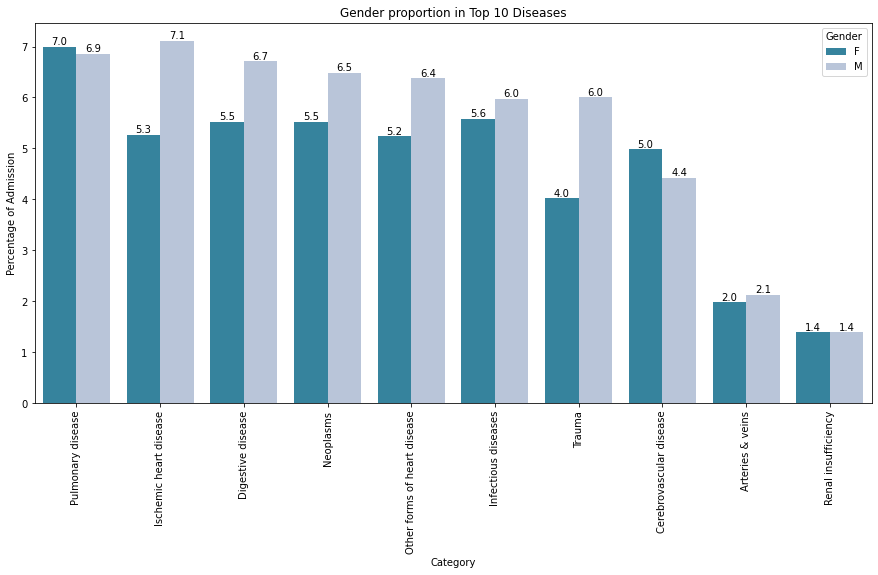

In [54]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data = top_10_m_f, x='category' ,y = 'percentage', hue= 'Gender',palette='PuBuGn_r')

for i in ax.containers:
    ax.bar_label(i , fmt = '%.1f')

plt.xlabel(x:="Category")
plt.ylabel(y:="Percentage of Admission")
plt.title(t:= "Gender proportion in Top 10 Diseases")

plt.xticks(rotation=90)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

# Working to Vizualize

### Diagnosis vs {Ethnicity
###                Seasons
###                 Marital Status
###                Emergency Type}

In [55]:
demDetail = pd.read_csv(r"demographic_detail.csv")

In [56]:
demDetail.columns

Index(['subject_id', 'hadm_id', 'marital_status_itemid',
       'marital_status_descr', 'ethnicity_itemid', 'ethnicity_descr',
       'overall_payor_group_itemid', 'overall_payor_group_descr',
       'religion_itemid', 'religion_descr', 'admission_type_itemid',
       'admission_type_descr', 'admission_source_itemid',
       'admission_source_descr'],
      dtype='object')

In [57]:
df2.columns, df2.shape

(Index(['subject_id_x', 'hadm_id', 'admit_dt', 'sex', 'dob', 'age_at_adm',
        'subject_id_y', 'sequence', 'code', 'description', 'category'],
       dtype='object'),
 (3922, 11))

In [58]:
df33 = df2.merge(demDetail, left_on = ["subject_id_x", "hadm_id"], right_on= ["subject_id", "hadm_id"], how="left")
df33

,subject_id_x,hadm_id,admit_dt,sex,dob,age_at_adm,subject_id_y,sequence,code,description,...,ethnicity_itemid,ethnicity_descr,overall_payor_group_itemid,overall_payor_group_descr,religion_itemid,religion_descr,admission_type_itemid,admission_type_descr,admission_source_itemid,admission_source_descr
0,3,2075,2682-09-07,M,2606-02-28,76.0,3.0,1.0,38.90,UNSPECIFIED SEPTICEMIA,...,200083,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
1,12,12532,2875-09-26,M,2803-05-14,72.0,12.0,1.0,157.00,MALIGNANT NEOPLASM OF HEAD OF PANCREAS,...,200083,WHITE,200052,MEDICARE,200047.0,JEWISH,200027,ELECTIVE,200065,PHYS REFERRAL/NORMAL DELI
2,21,20666,3138-10-29,M,3051-05-22,87.0,21.0,1.0,410.71,SUBENDOCARDIAL INFARCTION INITIAL EPISODE OF CARE,...,200083,WHITE,200052,MEDICARE,200047.0,JEWISH,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
3,26,15067,3079-03-03,M,3007-03-02,72.0,26.0,2.0,427.10,PAROXYSMAL VENTRICULAR TACHYCARDIA,...,200080,UNKNOWN/NOT SPECIFIED,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM
4,31,15325,2678-08-21,M,2606-05-17,72.0,31.0,1.0,345.30,GRAND MAL STATUS EPILEPTIC,...,200083,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,32686,30102,2612-05-27,M,2543-12-06,68.0,32686.0,1.0,518.81,ACUTE RESPIRATORY FAILURE,...,200083,WHITE,200067,PRIVATE,200081.0,UNOBTAINABLE,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM
3918,32705,33462,3337-04-06,F,3257-03-05,80.0,32705.0,1.0,38.90,UNSPECIFIED SEPTICEMIA,...,200083,WHITE,200067,PRIVATE,200068.0,PROTESTANT QUAKER,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM
3919,32706,35651,2676-03-20,M,2595-02-14,81.0,32706.0,1.0,431.00,INTRACEREBRAL HEMORRHAGE,...,200083,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
3920,32711,36069,3143-05-20,F,3057-12-21,85.0,32711.0,1.0,441.01,DISSECTION OF AORTA THORACIC,...,200083,WHITE,200052,MEDICARE,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT


In [59]:
df33.to_csv("patients_with_cat_and_diseases.csv", index = False)

In [60]:
df33.columns

Index(['subject_id_x', 'hadm_id', 'admit_dt', 'sex', 'dob', 'age_at_adm',
       'subject_id_y', 'sequence', 'code', 'description', 'category',
       'subject_id', 'marital_status_itemid', 'marital_status_descr',
       'ethnicity_itemid', 'ethnicity_descr', 'overall_payor_group_itemid',
       'overall_payor_group_descr', 'religion_itemid', 'religion_descr',
       'admission_type_itemid', 'admission_type_descr',
       'admission_source_itemid', 'admission_source_descr'],
      dtype='object')

In [61]:
all_ms = df33.groupby("category")['marital_status_descr'].value_counts().to_frame()

all_ms.rename(columns = {"marital_status_descr":"Count"}, inplace = True)

sorted_ms = all_ms.reset_index().sort_values(['marital_status_descr', 'Count'])

In [62]:
top_10 = df33.groupby("category").size().sort_values(ascending= False).head(10).index

top_10_cat = df33.groupby("category").size().sort_values(ascending= False).head(10)
# top_10_cat

top_10_ms = all_ms.loc[top_10]

top_10_ms = top_10_ms.assign(percentage = lambda x: top_10_ms["Count"]/top_10_ms["Count"].sum()*100)
top_10_ms = top_10_ms.reset_index() 

In [63]:
top_10_ms

,category,marital_status_descr,Count,percentage
0,Pulmonary disease,MARRIED,222,6.853967
1,Pulmonary disease,WIDOWED,105,3.241741
2,Pulmonary disease,SINGLE,93,2.871257
3,Pulmonary disease,DIVORCED,29,0.895338
4,Pulmonary disease,UNKNOWN (DEFAULT),6,0.185242
5,Pulmonary disease,SEPARATED,4,0.123495
6,Ischemic heart disease,MARRIED,213,6.576104
7,Ischemic heart disease,WIDOWED,123,3.797468
8,Ischemic heart disease,SINGLE,43,1.327570
9,Ischemic heart disease,DIVORCED,16,0.493980


# Visual that represents Percentages of Marital status against top 10 disease categories.

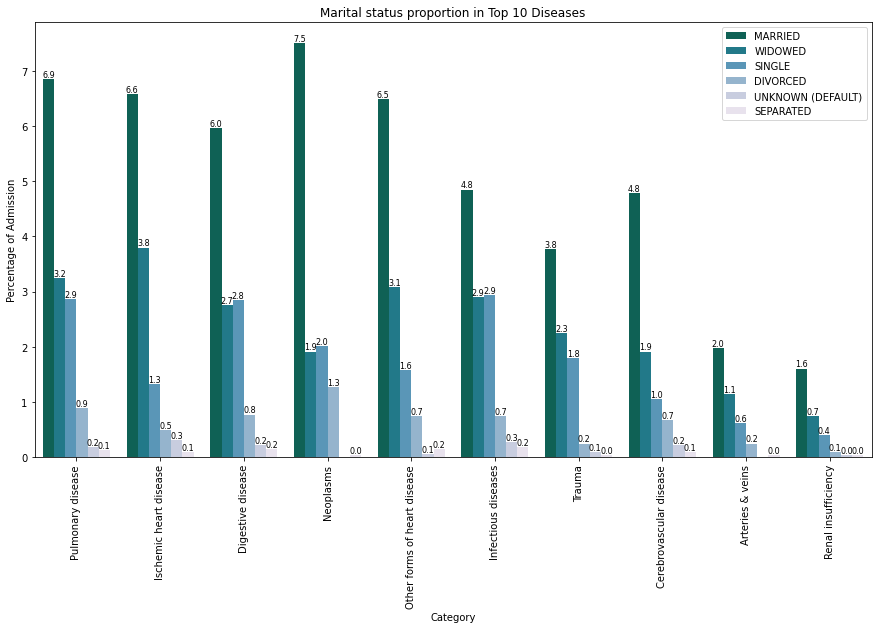

In [64]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(data = top_10_ms, x='category' ,y = 'percentage', hue= 'marital_status_descr', palette='PuBuGn_r')

for i in ax.containers:
    ax.bar_label(i , fmt = '%.1f', fontsize=8)

plt.xlabel(x:="Category")
plt.ylabel(y:="Percentage of Admission")
plt.title(t:= "Marital status proportion in Top 10 Diseases")
plt.legend(loc = "upper right")
plt.xticks(rotation=90)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

In [65]:
all_at = df33.groupby("category")['admission_type_descr'].value_counts().to_frame() #at = admission type

all_at.rename(columns = {"admission_type_descr":"Count"}, inplace = True)

sorted_at = all_at.reset_index().sort_values(['admission_type_descr', 'Count'])

# sns.barplot(data = sorted_at, x='category' ,y = 'Count', hue= 'admission_type_descr')

top_10 = df33.groupby("category").size().sort_values(ascending= False).head(10).index

top_10_cat = df33.groupby("category").size().sort_values(ascending= False).head(10)
# top_10_cat

top_10_at = all_at.loc[top_10]
# top_10_ms

top_10_at = top_10_at.assign(percentage = lambda x: top_10_at["Count"]/top_10_at["Count"].sum()*100)
top_10_at = top_10_at.reset_index() 


In [66]:
top_10_at

,category,admission_type_descr,Count,percentage
0,Pulmonary disease,EMERGENCY,453,12.796610
1,Pulmonary disease,URGENT,24,0.677966
2,Pulmonary disease,ELECTIVE,13,0.367232
3,Ischemic heart disease,EMERGENCY,379,10.706215
4,Ischemic heart disease,URGENT,43,1.214689
5,Ischemic heart disease,ELECTIVE,15,0.423729
6,Digestive disease,EMERGENCY,406,11.468927
7,Digestive disease,ELECTIVE,17,0.480226
8,Digestive disease,URGENT,10,0.282486
9,Neoplasms,EMERGENCY,271,7.655367


# Visual that represents Percentages of Admission Type against top 10 disease categories

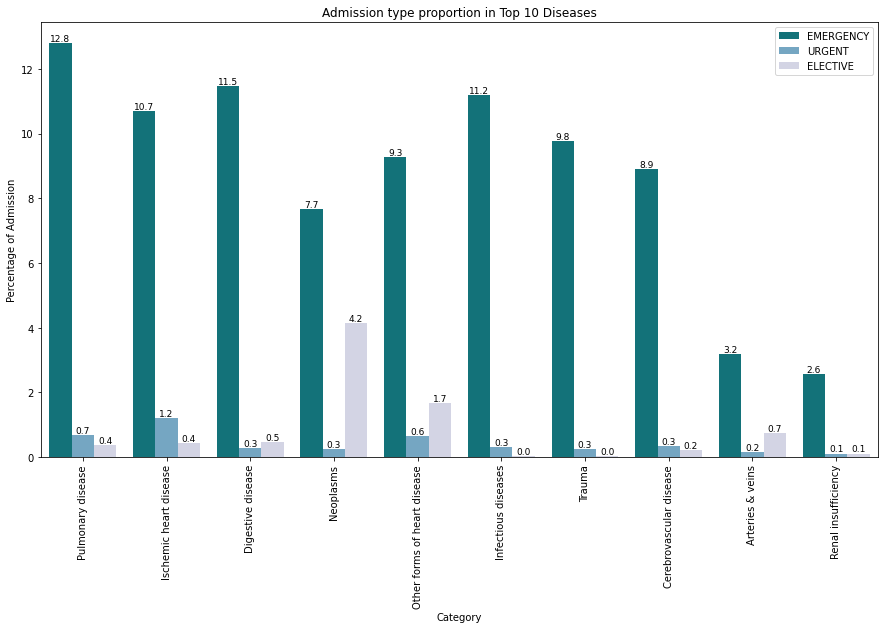

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(data = top_10_at, x='category' ,y = 'percentage', hue= 'admission_type_descr',palette='PuBuGn_r')

for i in ax.containers:
    ax.bar_label(i , fmt = '%.1f', fontsize=9)

plt.xlabel(x:="Category")
plt.ylabel(y:="Percentage of Admission")
plt.title(t:= "Admission type proportion in Top 10 Diseases")
plt.legend(loc = "upper right")
plt.xticks(rotation=90)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

In [4]:
df33 = pd.read_csv("patients_with_cat_and_diseases.csv")

## Extracting Seasons from Admission Date

In [5]:
""" 
Jan  1 Winter
Feb  2 Winter
Mar  3 Spring
Apr  4 Spring
May  5 Spring
Jun  6 Summer
Jul  7 Summer
Aug  8 Summer
Sep  9 Autumn
Oct  10 Autumn
Nov  11 Autumn
Dec  12 Winter 
"""

' \nJan  1 Winter\nFeb  2 Winter\nMar  3 Spring\nApr  4 Spring\nMay  5 Spring\nJun  6 Summer\nJul  7 Summer\nAug  8 Summer\nSep  9 Autumn\nOct  10 Autumn\nNov  11 Autumn\nDec  12 Winter \n'

In [6]:
winter = [12,1,2]
spring = [3,4,5]
summer = [6,7,8]
autumn = [9,10,11]

In [7]:
def seasons(date):
    
    month = int(np.datetime64(date).astype('object').month)
    
    if month in [12,1,2]:
        return "winter"
        
    elif month in [3,4,5]:
        return "spring"
    
    elif month in [6,7,8]:
        return "summer"
    
    elif month in [9,10,11]:
        return "autumn"

In [8]:
df33['seasons'] = df33.admit_dt.apply(seasons)

In [9]:
all_s = df33.groupby("category")['seasons'].value_counts().to_frame() #s = seasons

all_s.rename(columns = {"seasons":"Count"}, inplace = True)

sorted_s = all_s.reset_index().sort_values(['seasons', 'Count'])

top_10 = df33.groupby("category").size().sort_values(ascending= False).head(10).index

top_10_cat = df33.groupby("category").size().sort_values(ascending= False).head(10)

top_10_s = all_s.loc[top_10]

top_10_s = top_10_s.assign(percentage = lambda x: top_10_s["Count"]/top_10_s["Count"].sum()*100)
top_10_s = top_10_s.reset_index() 


In [10]:
top_10_s

,category,seasons,Count,percentage
0,Pulmonary disease,spring,146,4.124294
1,Pulmonary disease,winter,124,3.502825
2,Pulmonary disease,autumn,121,3.418079
3,Pulmonary disease,summer,99,2.796610
4,Ischemic heart disease,winter,128,3.615819
5,Ischemic heart disease,spring,110,3.107345
6,Ischemic heart disease,autumn,106,2.994350
7,Ischemic heart disease,summer,93,2.627119
8,Digestive disease,summer,120,3.389831
9,Digestive disease,autumn,109,3.079096


# Visual that represents Percentages of Seasons against top 10 disease categories

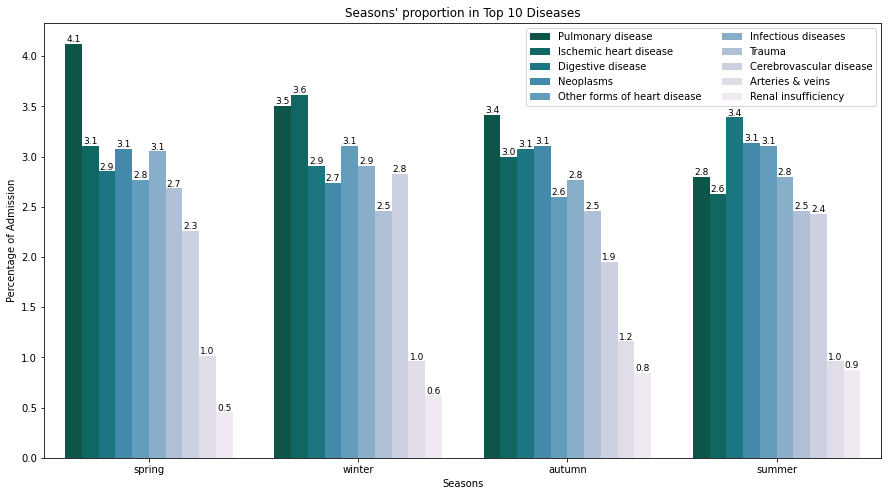

In [55]:
fig, ax = plt.subplots(figsize=(15, 8))

ax = sns.barplot(data = top_10_s, x='seasons' ,y = 'percentage', hue= 'category',palette='PuBuGn_r')

for i in ax.containers:
    ax.bar_label(i , fmt = '%.1f', fontsize=9)

plt.xlabel(x:="Seasons")
plt.ylabel(y:="Percentage of Admission")
plt.title(t:= "Seasons' proportion in Top 10 Diseases")


h,l = ax.axes.get_legend_handles_labels()
ax.axes.legend_.remove()
ax.legend(h,l, ncol=2) 


plt.xticks(rotation=0)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

In [76]:
df33.columns

Index(['subject_id_x', 'hadm_id', 'admit_dt', 'sex', 'dob', 'age_at_adm',
       'subject_id_y', 'sequence', 'code', 'description', 'category',
       'subject_id', 'marital_status_itemid', 'marital_status_descr',
       'ethnicity_itemid', 'ethnicity_descr', 'overall_payor_group_itemid',
       'overall_payor_group_descr', 'religion_itemid', 'religion_descr',
       'admission_type_itemid', 'admission_type_descr',
       'admission_source_itemid', 'admission_source_descr', 'seasons'],
      dtype='object')

In [57]:
all_e = df33.groupby("category")['ethnicity_descr'].value_counts().to_frame()#e = ethnicity
top_10 = df33.groupby("category").size().sort_values(ascending= False).head(10).index

# Visual that represents Percentages of Ethnicities against top 10 disease categories

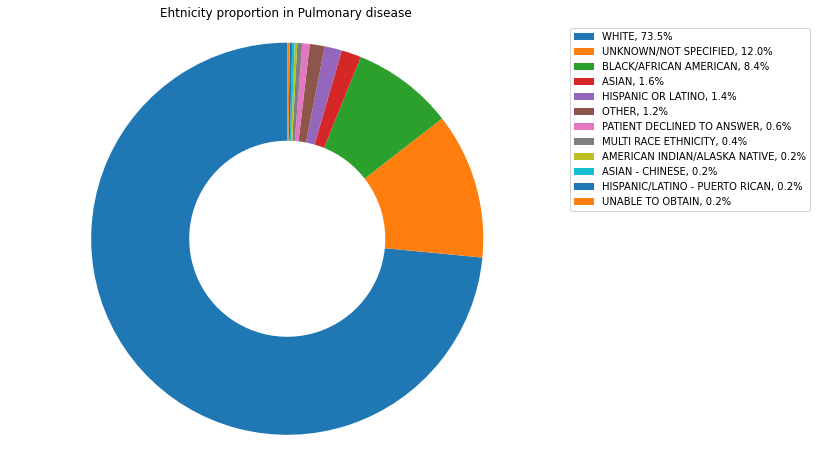

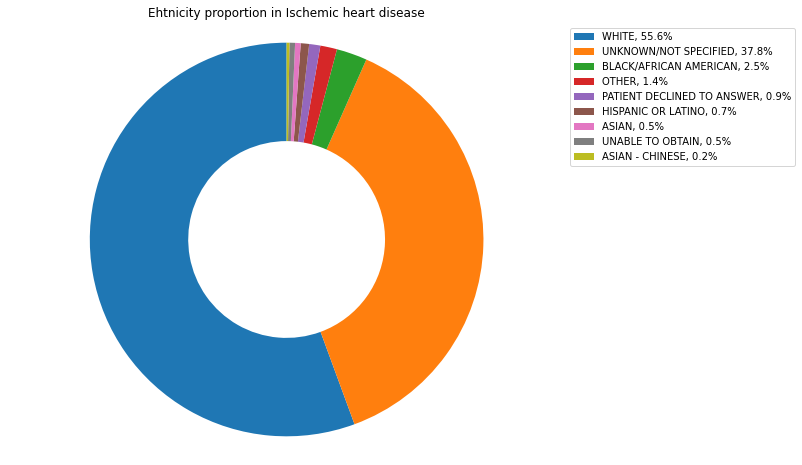

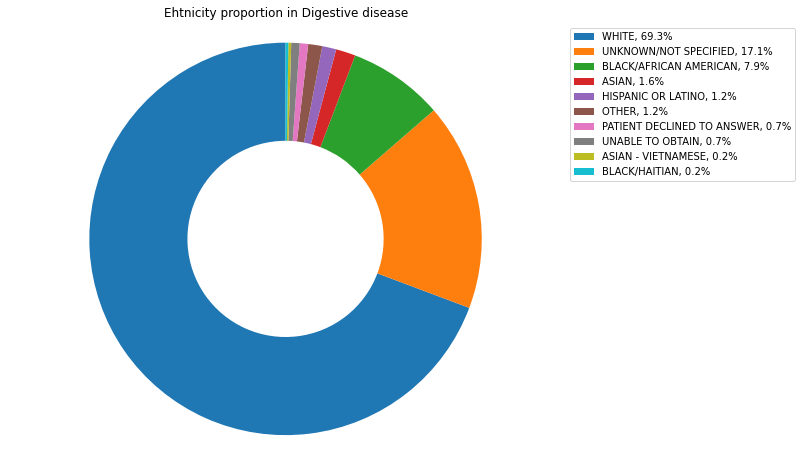

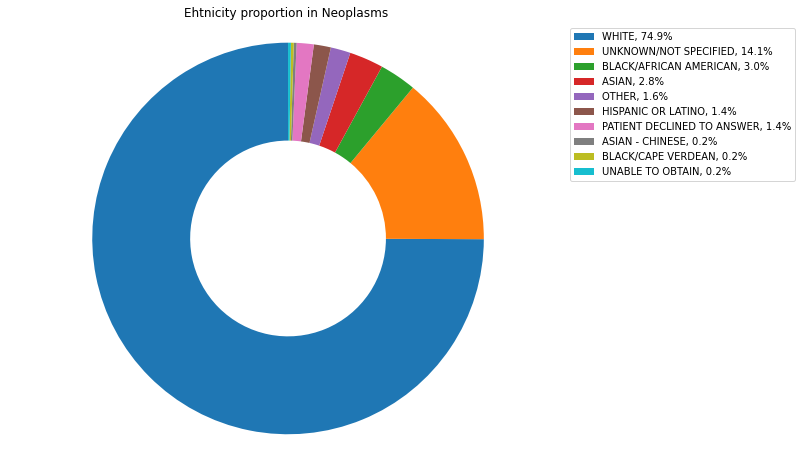

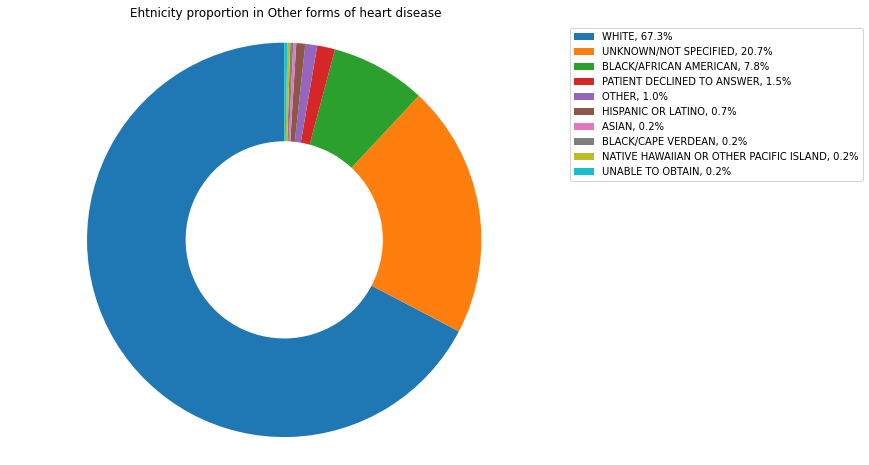

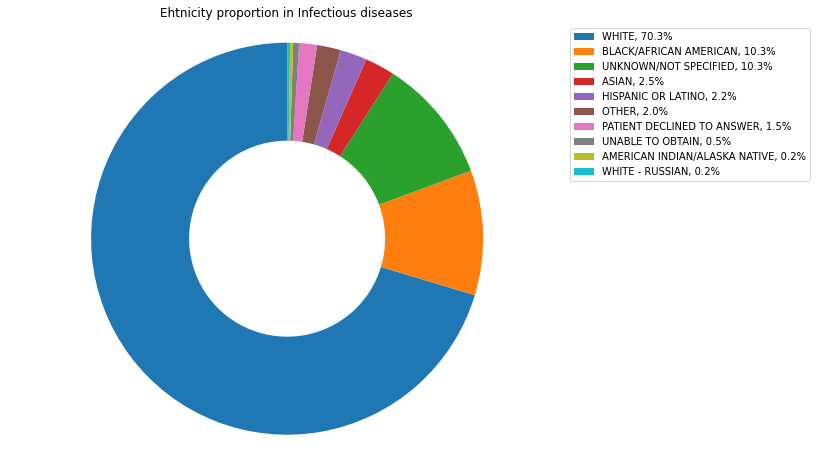

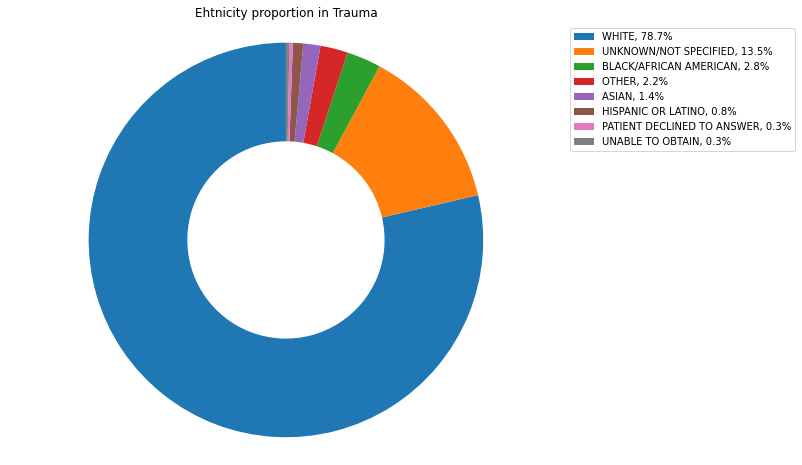

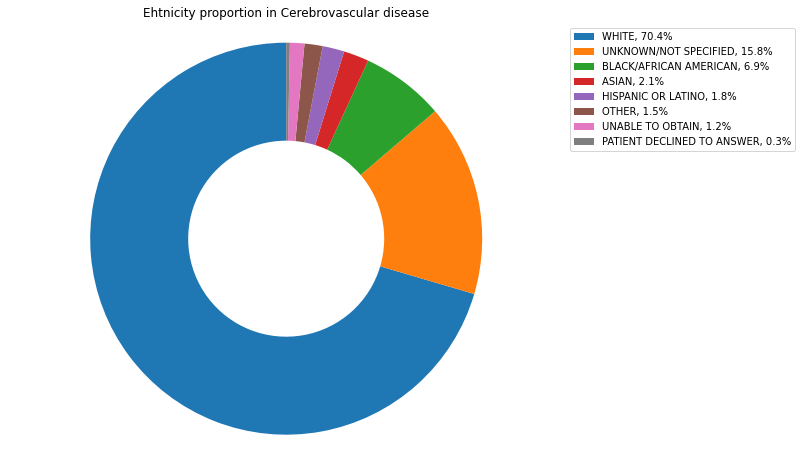

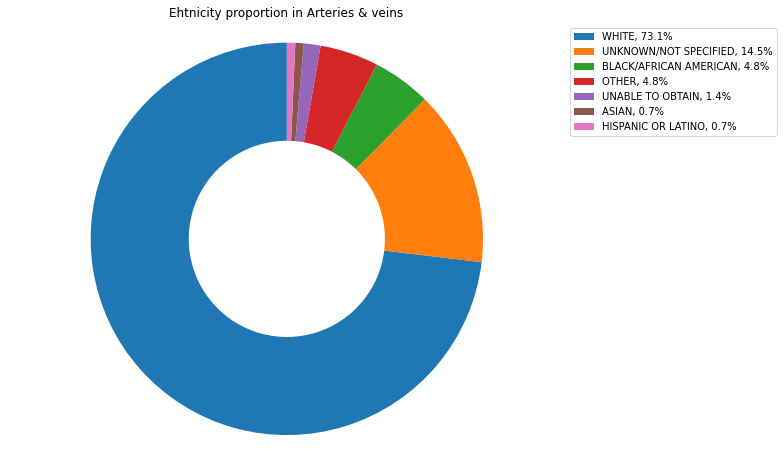

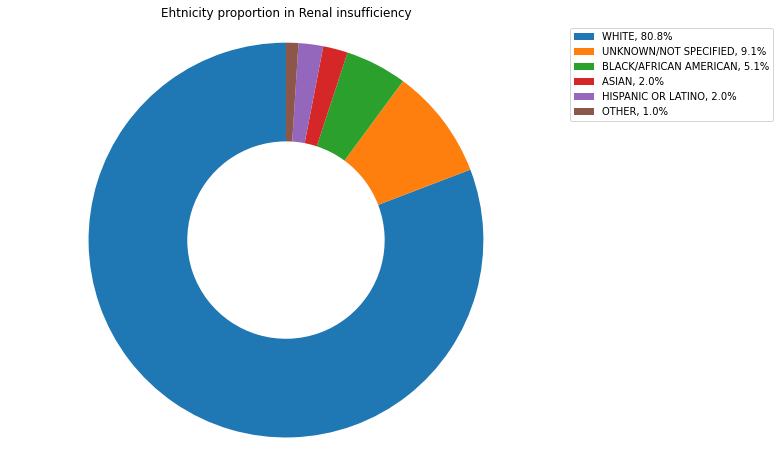

In [59]:
for i in top_10:
    plt.figure(figsize = (10,8))
    pie = all_e.loc[i]
    labels = pie.ethnicity_descr.index
    sizes = pie.ethnicity_descr.values
    percents = sizes * 100 / sizes.sum()
    pie = plt.pie(sizes ,startangle=90, wedgeprops=dict(width=0.5))
    plt.axis('equal')
    labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, percents)]
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=labels)
    plt.title(f"Ehtnicity proportion in {i}")
    plt.savefig(f"EDA_Eth_vs_Disease_{i}.jpg", bbox_inches = "tight")
    plt.show()

In [79]:
df33

,subject_id_x,hadm_id,admit_dt,sex,dob,age_at_adm,subject_id_y,sequence,code,description,...,ethnicity_descr,overall_payor_group_itemid,overall_payor_group_descr,religion_itemid,religion_descr,admission_type_itemid,admission_type_descr,admission_source_itemid,admission_source_descr,seasons
0,3,2075,2682-09-07,M,2606-02-28,76.0,3.0,1.0,38.90,UNSPECIFIED SEPTICEMIA,...,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,autumn
1,12,12532,2875-09-26,M,2803-05-14,72.0,12.0,1.0,157.00,MALIGNANT NEOPLASM OF HEAD OF PANCREAS,...,WHITE,200052,MEDICARE,200047.0,JEWISH,200027,ELECTIVE,200065,PHYS REFERRAL/NORMAL DELI,autumn
2,21,20666,3138-10-29,M,3051-05-22,87.0,21.0,1.0,410.71,SUBENDOCARDIAL INFARCTION INITIAL EPISODE OF CARE,...,WHITE,200052,MEDICARE,200047.0,JEWISH,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,autumn
3,26,15067,3079-03-03,M,3007-03-02,72.0,26.0,2.0,427.10,PAROXYSMAL VENTRICULAR TACHYCARDIA,...,UNKNOWN/NOT SPECIFIED,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM,spring
4,31,15325,2678-08-21,M,2606-05-17,72.0,31.0,1.0,345.30,GRAND MAL STATUS EPILEPTIC,...,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,32686,30102,2612-05-27,M,2543-12-06,68.0,32686.0,1.0,518.81,ACUTE RESPIRATORY FAILURE,...,WHITE,200067,PRIVATE,200081.0,UNOBTAINABLE,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM,spring
3918,32705,33462,3337-04-06,F,3257-03-05,80.0,32705.0,1.0,38.90,UNSPECIFIED SEPTICEMIA,...,WHITE,200067,PRIVATE,200068.0,PROTESTANT QUAKER,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM,spring
3919,32706,35651,2676-03-20,M,2595-02-14,81.0,32706.0,1.0,431.00,INTRACEREBRAL HEMORRHAGE,...,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,spring
3920,32711,36069,3143-05-20,F,3057-12-21,85.0,32711.0,1.0,441.01,DISSECTION OF AORTA THORACIC,...,WHITE,200052,MEDICARE,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,spring


In [80]:
df33.to_csv("summarized_icd_details_latest.csv", index = False)